# CSCI 303
# Introduction to Data Science
<p/>

### 10 - Exploratory Data Analysis

![Exploratory data analysis](eda.png)

## This Lecture
---
- Explore the California Housing data set

The obligatory setup code...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.datasets

from pandas import Series, DataFrame

plt.style.use('bmh')

%matplotlib inline

## The California Housing Dataset
---
A well known and heavily studied dataset for statistical inference.

Available in the scikit-learn package, or many sources online.

In [2]:
from sklearn.datasets import fetch_california_housing    
raw = fetch_california_housing()
#print(raw.target_names)
cali = DataFrame(raw.data, columns=raw.feature_names)

#example if you do not want to put the target in the cali dataframe
#X = cali
#y = raw.target

#example if you want to put the target in the cali dataframe, be sure to separate for ML
cali['MedHouseVal'] = raw.target
X = cali[['HouseAge', 'AveRooms', 'AveBedrms']]
y = cali['MedHouseVal']
#if you want to remove a column, you can use the .drop
#cali = cali.drop('MedHouseVal', axis=1)

cali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
print(raw.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

## Basic Statistics
---
pandas provides the `describe` function (similar to R's `summary`):

In [4]:
cali.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## What Shall We Explore?
---
Some ideas:

- distributions of individual inputs
- correlations between pairs of inputs and/or the target
- your suggestion here

## Distributions
---
Often best explored via histogram.

A histogram divides data into (usually) even sized *bins*, then counts the frequency of occurrence of samples in each bin.

For example, let's look at average number of rooms per dwelling.

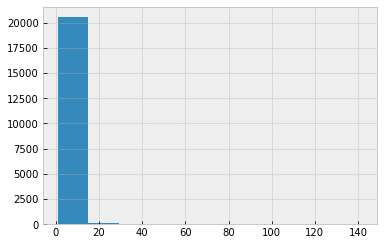

In [5]:
#using the defaults, does this give useful information?
plt.hist(cali['AveRooms'])
plt.show()

Very normal looking, isn't it?  We can vary the number of bins for more or less precision.

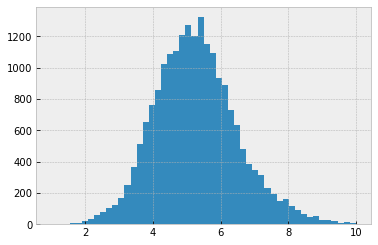

In [6]:
#maybe update the range and number of bins
plt.hist(cali['AveRooms'], bins=50, range=[1,10])
plt.show()

How about the average number of household members?

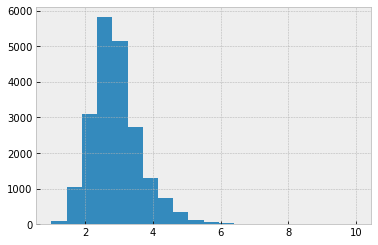

In [7]:
plt.hist(cali['AveOccup'], bins=20, range=[1,10]) 
plt.show()

## Correlations
---
Often best explored via a scatter plot.

I theorize that there will be a correlation between average number of bedrooms and average occupancy.  Let's take a look:

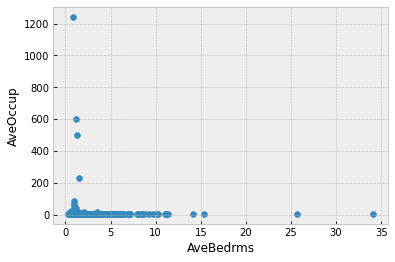

In [8]:
plt.scatter(cali['AveBedrms'], cali['AveOccup']) 
plt.xlabel('AveBedrms'); plt.ylabel('AveOccup');
plt.show()

There seems to be some odd artifacts on the AveOccup axis, we should explore further.

Let's take a closer look at the AveOccup data.

In [9]:
#find the max to double check the plot?
print(cali['AveOccup'].max())

#see what the counts of unique values are in this Series object
cali['AveOccup'].value_counts().head()
#cali['AveOccup'].value_counts()

1243.3333333333333


3.000000    35
2.000000    18
2.500000    17
2.666667    16
2.333333    13
Name: AveOccup, dtype: int64

These large numbers seems suspicious.  Some kind of accidental input, corporate housing, hmm?

In [10]:
#let's explore just the large values, starting with more than 10 occupants
caliSubset = cali[cali['AveOccup'] > 10]
caliSubset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,3.938989,29.972973,5.688776,1.171687,2615.648649,87.786668,36.105135,-119.856757,1.816920
std,3.132148,15.146482,3.872472,0.499331,2306.519868,232.632680,2.156088,2.050462,1.304639
min,0.499900,5.000000,2.111111,0.625000,13.000000,10.153846,32.560000,-122.500000,0.425000
25%,1.912500,17.000000,3.166667,0.937500,822.000000,12.296089,34.070000,-121.290000,1.154000
50%,3.419100,29.000000,5.123810,1.074713,1722.000000,15.602941,36.510000,-120.650000,1.425000
75%,4.302900,41.000000,6.468000,1.142857,4198.000000,21.333333,37.790000,-118.170000,2.125000
max,15.000100,52.000000,24.500000,3.500000,8733.000000,1243.333333,40.410000,-115.220000,5.000010


In [11]:
#looks like there are 37 out of the 20K+ samples that are in this selection
caliSubset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
91,0.8668,52.0,2.443182,0.988636,904.0,10.272727,37.80,-122.28,1.37500
270,3.8750,33.0,3.021277,0.659574,575.0,12.234043,37.78,-122.18,2.25000
1039,4.3029,16.0,6.090592,1.121951,4930.0,17.177700,38.42,-120.97,1.21900
1067,3.4191,52.0,4.530612,0.816327,1107.0,11.295918,39.73,-121.85,1.37500
1617,11.7064,17.0,9.361702,1.127660,1722.0,12.212766,37.84,-122.08,5.00001


What are the chances that 37 out of the 20K+ samples are corrupt or not usable?

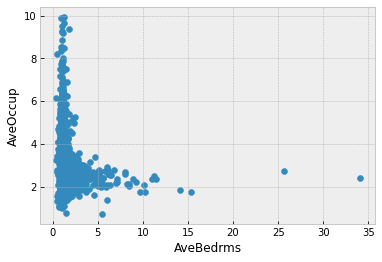

In [12]:
#let's redo our scatterplot without those samples in it
caliSubset = cali[cali['AveOccup'] <= 10]
plt.scatter(caliSubset['AveBedrms'], caliSubset['AveOccup']) 
plt.xlabel('AveBedrms'); plt.ylabel('AveOccup');
plt.show()

That looks better!
Wait ... now what is going on with the AveBedrms? 35 bedrooms, that is a big house!

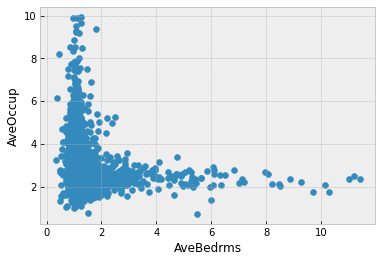

In [13]:
#shall we further refine the dataset, removing those possible outliers, using a best guess?
caliSubset = caliSubset[caliSubset['AveBedrms'] <= 13]
plt.scatter(caliSubset['AveBedrms'], caliSubset['AveOccup']) 
plt.xlabel('AveBedrms'); plt.ylabel('AveOccup');
plt.show()

What shall we look at now? We could check to see if there is a correlation between average number of rooms and the target, median value?

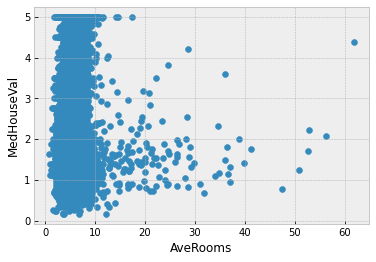

In [14]:
plt.scatter(caliSubset['AveRooms'], caliSubset['MedHouseVal']) 
plt.xlabel('AveRooms'); plt.ylabel('MedHouseVal');
plt.show()

In [15]:
#Wow - what is going on at the 500K, lots clustered up there? How should we look?
print(caliSubset['MedHouseVal'].max())
caliSubset['MedHouseVal'].value_counts().iloc[:10]

5.00001


5.00001    960
1.37500    119
1.62500    111
1.12500    103
1.87500     93
2.25000     89
3.50000     78
0.87500     77
2.75000     65
1.50000     64
Name: MedHouseVal, dtype: int64

In [16]:
caliSubset[caliSubset['MedHouseVal'] >= 5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
494,9.3959,52.0,7.512097,0.955645,1366.0,2.754032,37.85,-122.24,5.00001
509,7.8772,52.0,8.282548,1.049861,947.0,2.623269,37.83,-122.23,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


I'm quite suspicious that this value is some kind of data-entry default.

1. It's the same number, 5.001 for 987 of the entries?
2. It's the maximum and same value no matter the number of rooms, age, etc. Could be some big outliers in there!

For now, let's remove that data. It might not be justified, but without access to the original data collection info, it makes the most sense to me.

In [17]:
caliSubset = caliSubset[caliSubset['MedHouseVal'] < 5]
caliSubset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


We are left with over 19K samples, we can move on ... see how it goes!

We have done some histograms and scatter plots to explore our data, removed some possible outliers ... now what?

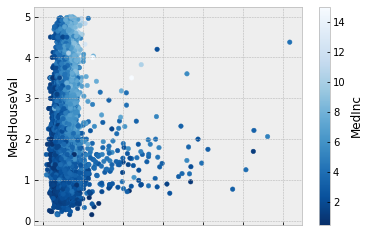

In [18]:
# another way to plot, we can add a 3rd dimension of MedInc using a gradiant of color
# using our caliSubset with some outliers removed, plot using the pandas plotting library
caliSubset.plot(kind='scatter', x='AveRooms', y='MedHouseVal', c='MedInc', colormap='Blues_r') 
plt.show()

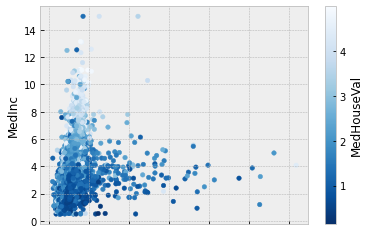

In [19]:
# we can change our a 3rd dimension to our target using a gradiant of color
# using our caliSubset with some outliers removed, plot using the pandas plotting library
caliSubset.plot(kind='scatter', x='AveRooms', y='MedInc', c='MedHouseVal', colormap='Blues_r') 
plt.show()

So these plots makes some sense with the value increasing as the income increases ... 

- Recall, we removed some suspicious data.

- We almost certainly lost some good data.

- Was removing data the right thing to do?

Other questions we could explore:
    
- What could we do with the Latitude and Longitude features?
- Does population have any berring on the target?
- Enter here during class

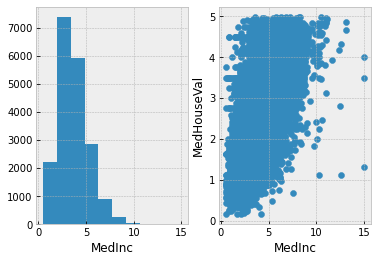

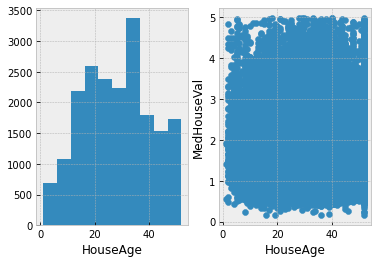

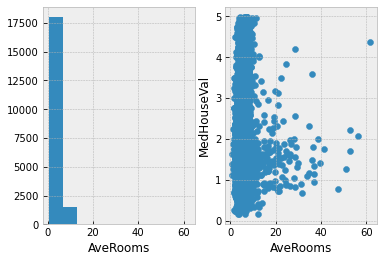

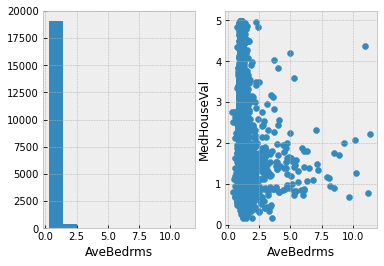

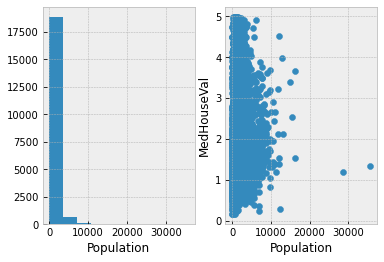

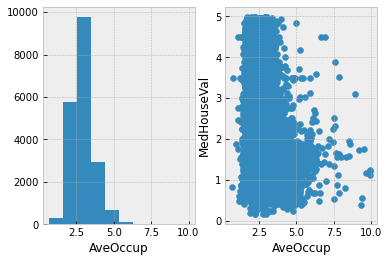

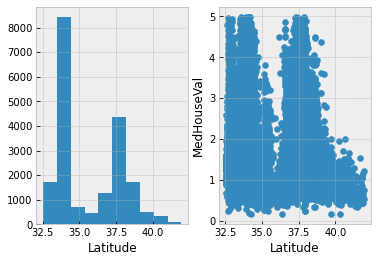

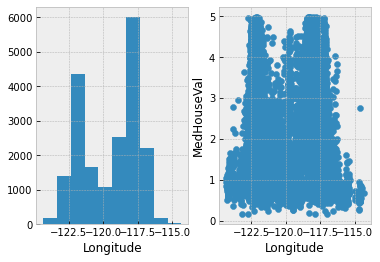

In [20]:
# plots all correlations with both a histogram and a scatterplot
for f in raw.feature_names:
    plt.subplot(1,2,1)
    plt.hist(caliSubset[f])
    plt.xlabel(f)
    plt.subplot(1,2,2)
    plt.scatter(caliSubset[f], caliSubset['MedHouseVal'])
    plt.xlabel(f)
    plt.ylabel('MedHouseVal')
    plt.show()
    